<a href="https://colab.research.google.com/github/amjathhussain31/LibraryManagementSystem/blob/main/LUNG_CANCER_DETECTION_AMJATH_HUSSIAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/contant'

In [ ]:
#!kaggle competitions download -c titanic
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
100% 2.29G/2.29G [01:31<00:00, 27.5MB/s]
100% 2.29G/2.29G [01:31<00:00, 27.1MB/s]


In [ ]:
!unzip \*.zip && rm* .zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0448-0001.jpeg  
  inflating: ches

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob

# **COUNT THE DATA**

In [ ]:
ROOT_DIR = "/content/chest_xray"
number_of_images = {}

for dir in os.listdir(ROOT_DIR ):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

In [ ]:
number_of_images.items()

dict_items([('test', 2), ('__MACOSX', 2), ('val', 2), ('train', 2), ('chest_xray', 4)])

In [ ]:
len(os.listdir("/content/chest_xray"))

5

In [ ]:
!pip install -q keras
!pip install-q kernal_size

ERROR: unknown command "install-q" - maybe you meant "install"


# MODEL BUILDING


In [ ]:
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import keras

# CNN MODEL

In [ ]:
model = Sequential()

model.add(Conv2D(filters= 16 , kernel_size= (3,3), activation= 'relu', input_shape = (224,224,3) ))

model.add(Conv2D(filters= 36 , kernel_size= (3,3), activation= 'relu'))
model.add(MaxPool2D(pool_size= (2,2)))

model.add(Conv2D(filters= 64 , kernel_size= (3,3), activation= 'relu'))
model.add(MaxPool2D(pool_size= (2,2)))

model.add(Conv2D(filters= 128 , kernel_size= (3,3), activation= 'relu'))
model.add(MaxPool2D(pool_size= (2,2)))

model.add(Dropout(rate= 0.25))

model.add(Flatten())
model.add(Dense(units=64, activation= 'relu'))
model.add(Dropout(rate= 0.25))
model.add(Dense(units= 1, activation= 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 36)      5220      
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 36)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      20800     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 128)       7

In [ ]:
model.compile(optimizer='adam', loss= keras.losses.binary_crossentropy, metrics=['accuracy'])

# PREPARING OUR DATA USING DATA GENERATOR

In [ ]:
def preprocessingImages1(path):
  "input :path"
  "output :pre processed images"

  image_data = ImageDataGenerator(zoom_range= 0.2, shear_range=0.2, rescale= 1/225, horizontal_flip= True)
  image = image_data.flow_from_directory(directory = path, target_size = (224,224), batch_size = 32, class_mode= 'binary')
  return image

In [ ]:
path = "/content/chest_xray/train"
train_data = preprocessingImages1(path)

Found 5216 images belonging to 2 classes.


In [ ]:
def preprocessingImages2(path):
  "input :path"
  "output :pre processed images"

  image_data = ImageDataGenerator(rescale= 1/225)
  image = image_data.flow_from_directory(directory = path, target_size = (224,224), batch_size = 32, class_mode= 'binary')
  return image

In [ ]:
path = "/content/chest_xray/test"
test_data = preprocessingImages2(path)

Found 624 images belonging to 2 classes.


In [ ]:
path = "/content/chest_xray/val"
val_data = preprocessingImages2(path)

Found 16 images belonging to 2 classes.


# EARLY STOPPING AND MODEL CHECK POINT

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

#early stopping

es = EarlyStopping(monitor="val_accuracy", min_delta= 0.01, patience= 3, verbose= 1, mode = 'auto')

#model check point
mc = ModelCheckpoint(monitor="val_accuracy", filepath="./bestmodel.h5", verbose= 1, save_best_only= True, mode = 'auto')

cd = [es,mc]

# MODEL TRANING

In [ ]:
hs = model.fit_generator(generator= train_data,
                         steps_per_epoch= 8,
                         epochs= 30,
                         verbose= 1,
                         validation_data= val_data,
                         validation_steps= 16,
                         callbacks= cd  )

<ipython-input-18-88ca25df6217>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hs = model.fit_generator(generator= train_data,


Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 0.7182 - accuracy: 0.6953


Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to ./bestmodel.h5
8/8 [==============================] - 71s 9s/step - loss: 0.7182 - accuracy: 0.6953 - val_loss: 0.9138 - val_accuracy: 0.5000


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 0.5952 - accuracy: 0.7188

8/8 [==============================] - 51s 6s/step - loss: 0.5952 - accuracy: 0.7188
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 0.5019 - accuracy: 0.7539

8/8 [==============================] - 51s 6s/step - loss: 0.5019 - accuracy: 0.7539
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 0.3862 - accuracy: 0.7773

8/8 [==============================] - 52s 6s/step - loss: 0.3862 - accuracy: 0.7773
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 0.3926 - accuracy: 0.8516

8/8 [==============================] - 50s 6s/step - loss: 0.3926 - accuracy: 0.8516
Epoch 6/30
8/8 [==============================] - ETA: 0s - loss: 0.3351 - accuracy: 0.8594

8/8 [==============================] - 55s 6s/step - loss: 0.3351 - accuracy: 0.8594
Epoch 7/30
8/8 [==============================] - ETA: 0s - loss: 0.2784 - accuracy: 0.8672

8/8 [==============================] - 51s 6s/step - loss: 0.2784 - accuracy: 0.8672
Epoch 8/30
8/8 [==============================] - ETA: 0s - loss: 0.2715 - accuracy: 0.8633

8/8 [==============================] - 54s 6s/step - loss: 0.2715 - accuracy: 0.8633
Epoch 9/30
8/8 [==============================] - ETA: 0s - loss: 0.4117 - accuracy: 0.8320

8/8 [==============================] - 51s 6s/step - loss: 0.4117 - accuracy: 0.8320
Epoch 10/30
8/8 [==============================] - ETA: 0s - loss: 0.3302 - accuracy: 0.8438

8/8 [==============================] - 49s 6s/step - loss: 0.3302 - accuracy: 0.8438
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 0.2486 - accuracy: 0.9141

8/8 [==============================] - 48s 6s/step - loss: 0.2486 - accuracy: 0.9141
Epoch 12/30
8/8 [==============================] - ETA: 0s - loss: 0.3097 - accuracy: 0.8359

8/8 [==============================] - 49s 6s/step - loss: 0.3097 - accuracy: 0.8359
Epoch 13/30
8/8 [==============================] - ETA: 0s - loss: 0.3975 - accuracy: 0.8555

8/8 [==============================] - 50s 6s/step - loss: 0.3975 - accuracy: 0.8555
Epoch 14/30
8/8 [==============================] - ETA: 0s - loss: 0.2667 - accuracy: 0.9023

8/8 [==============================] - 48s 6s/step - loss: 0.2667 - accuracy: 0.9023
Epoch 15/30
8/8 [==============================] - ETA: 0s - loss: 0.2678 - accuracy: 0.8984

8/8 [==============================] - 49s 6s/step - loss: 0.2678 - accuracy: 0.8984
Epoch 16/30
8/8 [==============================] - ETA: 0s - loss: 0.2772 - accuracy: 0.8555

8/8 [==============================] - 50s 6s/step - loss: 0.2772 - accuracy: 0.8555
Epoch 17/30
8/8 [==============================] - ETA: 0s - loss: 0.2928 - accuracy: 0.8750

8/8 [==============================] - 49s 6s/step - loss: 0.2928 - accuracy: 0.8750
Epoch 18/30
8/8 [==============================] - ETA: 0s - loss: 0.2808 - accuracy: 0.8789

8/8 [==============================] - 51s 6s/step - loss: 0.2808 - accuracy: 0.8789
Epoch 19/30
8/8 [==============================] - ETA: 0s - loss: 0.2496 - accuracy: 0.9062

8/8 [==============================] - 50s 6s/step - loss: 0.2496 - accuracy: 0.9062
Epoch 20/30
8/8 [==============================] - ETA: 0s - loss: 0.2694 - accuracy: 0.8906

8/8 [==============================] - 49s 6s/step - loss: 0.2694 - accuracy: 0.8906
Epoch 21/30
8/8 [==============================] - ETA: 0s - loss: 0.2266 - accuracy: 0.9062

8/8 [==============================] - 48s 6s/step - loss: 0.2266 - accuracy: 0.9062
Epoch 22/30
8/8 [==============================] - ETA: 0s - loss: 0.2830 - accuracy: 0.8750

8/8 [==============================] - 49s 6s/step - loss: 0.2830 - accuracy: 0.8750
Epoch 23/30
8/8 [==============================] - ETA: 0s - loss: 0.2858 - accuracy: 0.8594

8/8 [==============================] - 48s 6s/step - loss: 0.2858 - accuracy: 0.8594
Epoch 24/30
8/8 [==============================] - ETA: 0s - loss: 0.2520 - accuracy: 0.8828

8/8 [==============================] - 55s 7s/step - loss: 0.2520 - accuracy: 0.8828
Epoch 25/30
8/8 [==============================] - ETA: 0s - loss: 0.2797 - accuracy: 0.8633

8/8 [==============================] - 48s 6s/step - loss: 0.2797 - accuracy: 0.8633
Epoch 26/30
8/8 [==============================] - ETA: 0s - loss: 0.2699 - accuracy: 0.8672

8/8 [==============================] - 49s 6s/step - loss: 0.2699 - accuracy: 0.8672
Epoch 27/30
8/8 [==============================] - ETA: 0s - loss: 0.2773 - accuracy: 0.8711

8/8 [==============================] - 50s 6s/step - loss: 0.2773 - accuracy: 0.8711
Epoch 28/30
8/8 [==============================] - ETA: 0s - loss: 0.2562 - accuracy: 0.8945

8/8 [==============================] - 49s 6s/step - loss: 0.2562 - accuracy: 0.8945
Epoch 29/30
8/8 [==============================] - ETA: 0s - loss: 0.2145 - accuracy: 0.9219

8/8 [==============================] - 50s 6s/step - loss: 0.2145 - accuracy: 0.9219
Epoch 30/30
8/8 [==============================] - ETA: 0s - loss: 0.2710 - accuracy: 0.8945

8/8 [==============================] - 50s 6s/step - loss: 0.2710 - accuracy: 0.8945


In [ ]:
#KeyError: 'val_accuracy'
#validation_data= val_data

# MODEL GRAPHICAL INTERPRETATION


In [ ]:
h = hs.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

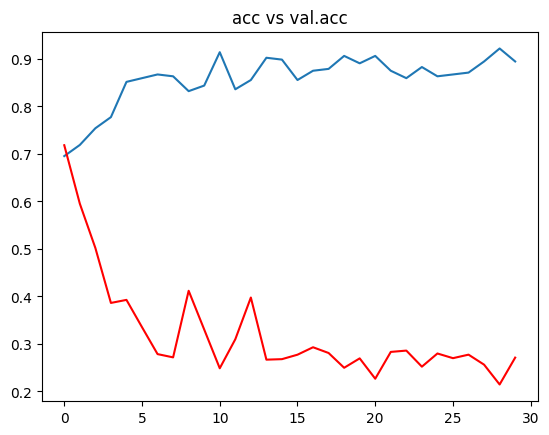

In [ ]:
import matplotlib.pyplot as plt
plt.plot(h['accuracy'])
plt.plot(h['loss'], c = "red")

plt.title("acc vs val.acc")
plt.show()


# MODEL ACCURACY

In [ ]:
#from keras.models import load_model
#model = load_model("/content/bestmodel.h5")
import tensorflow as tf

model = tf.keras.models.load_model("/content/bestmodel.h5")

In [ ]:
acc = model.evaluate_generator(test_data)[1]

print(f"the accuracy of our model is {acc*100} %")

<ipython-input-23-30a9a079863a>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc = model.evaluate_generator(test_data)[1]


the accuracy of our model is 62.5 %


In [ ]:
!pip install keras.preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.4 MB/s eta 0:00:00


In [ ]:
from keras.preprocessing.image import load_img, img_to_array

In [ ]:
train_data.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

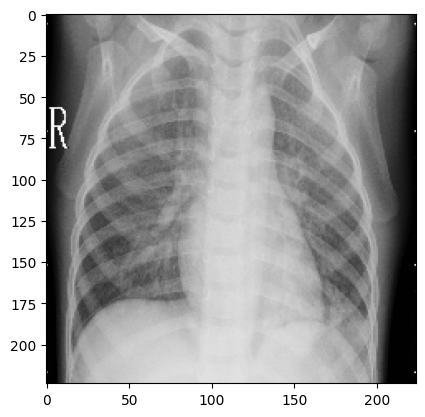

1/1 [==============================] - 0s 150ms/step
The predicted class is: 0.8195641040802002
The MRI is not having lungs cancer


In [ ]:
from keras.models import load_model
import tensorflow as tf

# Load the model
model = tf.keras.models.load_model("/content/bestmodel.h5")

# Load the image with the desired target size
path = "/content/chest_xray/val/PNEUMONIA/person1950_bacteria_4881.jpeg"
img = load_img(path, target_size=(224, 224))

# Show the image
plt.imshow(img)
plt.show()

# Convert the image to a NumPy array
import_arr = img_to_array(img)

# Normalize the image
import_arr = import_arr / 225.0

# Make sure the input data type is float32
import_arr = import_arr.astype(np.float32)

# Add an extra dimension to the input data
import_arr = np.expand_dims(import_arr, axis=0)

# Predict the class of the input image
pred = model.predict(import_arr)[0][0]

# Print the prediction
print(f"The predicted class is: {pred}")

# Interpret the prediction
if pred == 0:
    print("The MRI is having lungs cancer")
else:
    print("The MRI is not having lungs cancer")